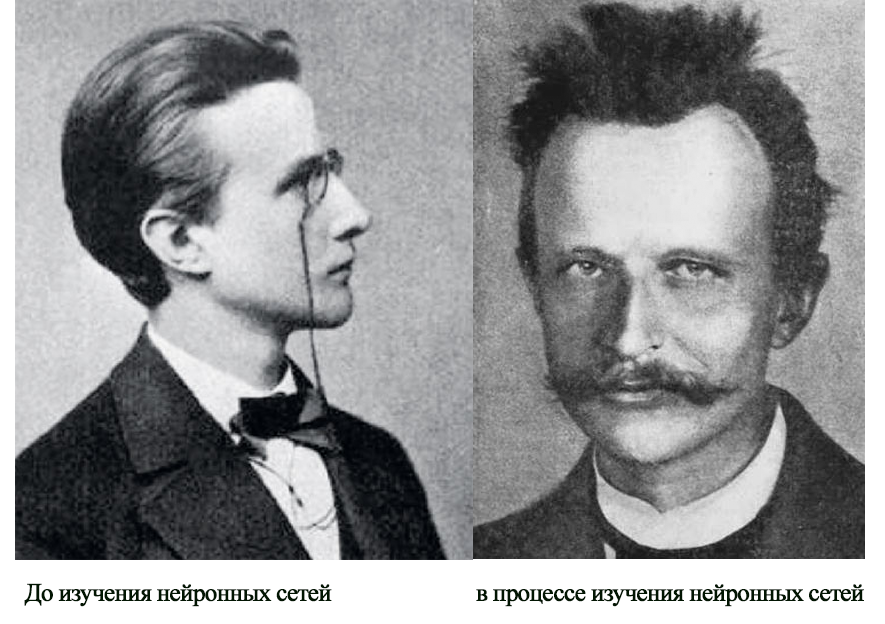

In [1]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
import ignite

In [8]:
device = torch . device ( "cuda:0" if torch . cuda . is_available () else "cpu" )
if torch.cuda.is_available():
    model = model.cuda()

In [3]:
from torch.utils.data import Dataset
import os

In [4]:
from natsort import natsorted
from PIL import Image

class TrainDataset(Dataset):
    def __init__(self, m_dir, transform):
        
        # Set the loading directory
        self.m_dir = m_dir
        self.transform = transform
        
        downs_imgs = os.listdir(os.path.join(m_dir, 'downs'))
        peaks_imgs = os.listdir(os.path.join(m_dir, 'peaks'))
        rises_imgs = os.listdir(os.path.join(m_dir, 'rises'))
        
        dimg = natsorted(downs_imgs)
        pimg = natsorted(peaks_imgs)
        rimg = natsorted(rises_imgs)
        self.total_imgs = dimg + pimg + rimg
        
    
    def __len__(self):
        # Return the previously computed number of images
        return len(self.total_imgs)
    
    
    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
     
        # Use PIL for image loading
        image = Image.open(img_loc).convert("RGB")
        # Apply the transformations
        tensor_image = self.transform(image)
        return tensor_image

    

In [5]:
dataset = TrainDataset(m_dir=".\\dataset\\Train", transform=transform)
dataloader = DataLoader(dataset)
print(next(iter(dataloader)).shape)  # prints shape of image with single batch

NameError: name 'transform' is not defined


    '''
    trainset_folder = 'dataset/Train'
        
    for downs in os.listdir(trainset_folder):
        down_folder = os.path.join(trainset_folder, 'downs')
        with open(down_folder, 'r') as downs_file:
            for name in downs_file.read().splitlines():
                self.samples.append((type))
            
    for peaks in os.listdir(trainset_folder):
        peaks_folder = os.path.join(trainset_folder, 'peaks')
        with open(peaks_folder, 'r') as peaks_file:
            for name in peaks_file.read().splitlines():
                self.samples.append((type))
            
    for rises in os.listdir(trainset_folder):
        rises_folder = os.path.join(trainset_folder, 'rises')
        with open(rises_folder, 'r') as rises_file:
            for name in rises_file.read().splitlines():
                self.samples.append((type))
            


    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]


if __name__ == '__main__':
    dataset = TrainDataset('dataset/Train')
    print(len(dataset))
    print(dataset[420])

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        #1-й сверточный слой, 3 входа - изображение rgb, выходов = входов следующего слоя, размер окна 3
        self.c1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        #2-й сверточный слой
        self.c2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        #3-й сверточный слой
        self.c3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        #Далее линейные слои
        self.fc1 = nn.Linear(in_features=6272, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=412)
        #Последний out_features = 3 соответствует типам изображений в датасете, у нас 3 типа - downs peaks rises
        self.fc4 = nn.Linear(in_features=412, out_features=3)
    
    
    def forward(self, x):
        
        x = F.relu(F.max_pool2d(self.c1(x), 3))
        x = F.relu(F.max_pool2d(self.c2(x), 3))
        x = F.relu(F.max_pool2d(self.c3(x), 3))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x
    
        
net = Net()
print(net)

Net()


In [10]:
# CrossEntropyLoss() идеально подходит для задач классификации изображений (C)
criterion = torch.nn.CrossEntropyLoss()
# lr - коэффициент обучения, который определяет насколько оптимизатор оптимизирует нашу нейронную сеть
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)

NameError: name 'model' is not defined

In [11]:
#!!!!!ПЕРЕМЕННЫЕ ПОКА ЧТО НЕ ПОДОГНАНЫ ПОД НАШ ДАТАСЕТ!!!!!!!!

for epoch in range(10): # 10 полных проходов по нашим данным
    for data, label in loaders['train']: #  батч наших данных
        if torch.cuda.is_available(): # Пробуем перевести данные в память гпу
            data, label = data.cuda(), label.cuda()
        output = model(data)    
        loss = criterion(output, label)        
        optimizer.zero_grad() # устанавливаем значение градиента в 0 перед вычислением функции потерь.
        loss.backward()  # передаем это значение назад по сети
        optimizer.step() # пытаемся оптимизировать значение весов исходя из потерь и градиента
    model.eval()
    print('Epoch: ', epoch, 'Loss: ', loss.item()) # выводим на экран значение функции потерь
    total_correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(loaders['train']):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        max_arg_output = torch.argmax(output, dim=1)
        total_correct += int(torch.sum(max_arg_output == target))
        total += data.shape[0]
    print('Training accuracy: {:.0%}'.format(total_correct/total))

NameError: name 'loaders' is not defined